In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house/Housing.csv
/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv
/kaggle/input/insurance/insurance.csv


## import required libraries

In [3]:
import pandas as pd # for data proccecing and analysis
import numpy as np # for linear algebra
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# importing the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
# the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# the shape and the size of the dataset
print(f"shape : {df.shape}")
print(f"size  : {df.size}")

shape : (1338, 7)
size  : 9366


In [6]:
# data types and null elements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# basic stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## data visualization

Text(0.5, 1.0, 'the charges based on the sex and age')

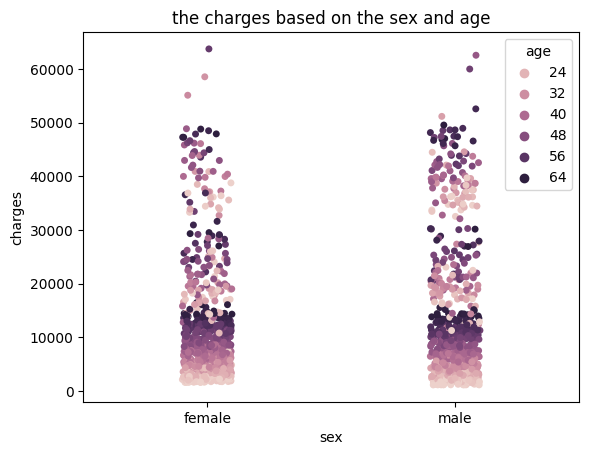

In [59]:
sns.stripplot(data=df,x='sex',y='charges',hue='age')
plt.title('the charges based on the sex and age')

In [9]:
df[(df['charges']>14000) & (df['age']>30) & (df['smoker']=='yes')].shape


(179, 7)

Text(0.5, 1.0, 'smokers based on sex and age')

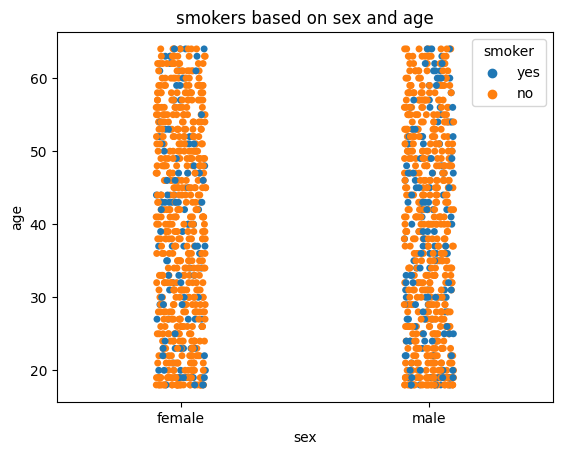

In [60]:
sns.stripplot(data=df,x='sex',y='age',hue='smoker')
plt.title('smokers based on sex and age')

In [11]:
(204/390)*100

52.307692307692314

Text(0.5, 1.0, 'distribution of charges based on bmi and smoker state')

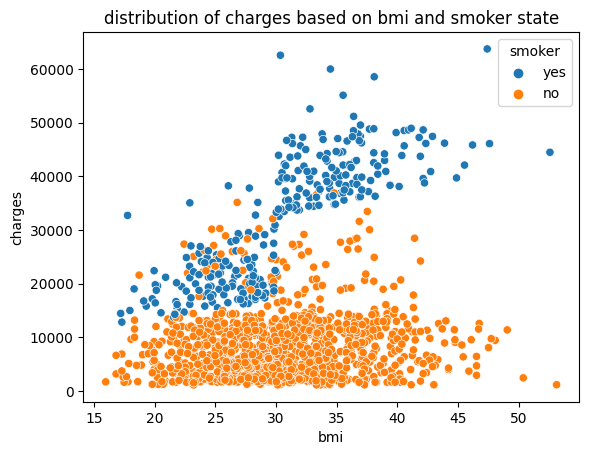

In [61]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.title('distribution of charges based on bmi and smoker state')

<AxesSubplot: xlabel='bmi', ylabel='charges'>

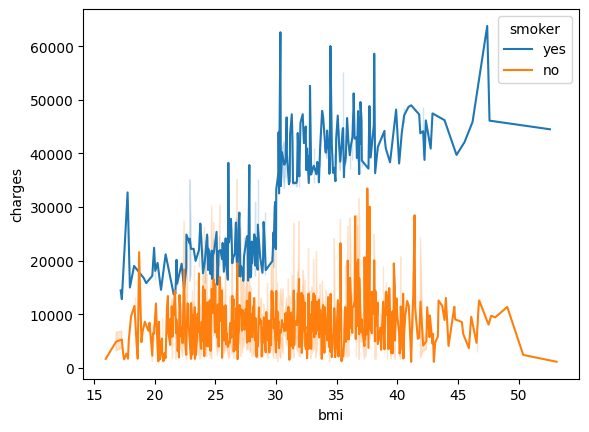

In [65]:
sns.lineplot(data=df,x='bmi',y='charges',hue='smoker')

we see that for non smokers who have bmi more thar 30b bmi charges more than peaple who has less than 30 bmi and smokers in generale, and the smokers charges on mean(13500) whatever the bmi 

<AxesSubplot: xlabel='age', ylabel='charges'>

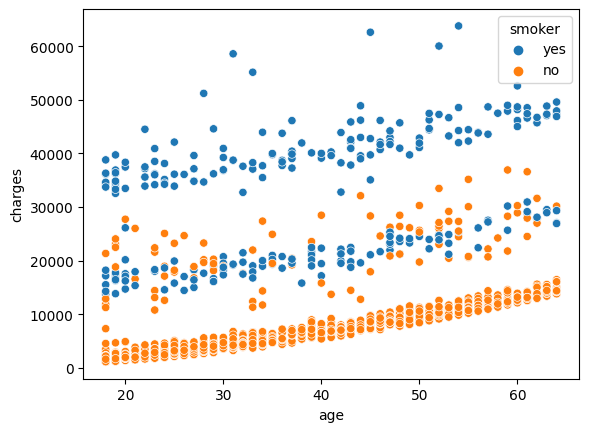

In [13]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

Text(0.5, 1.0, 'charges variation depending on age')

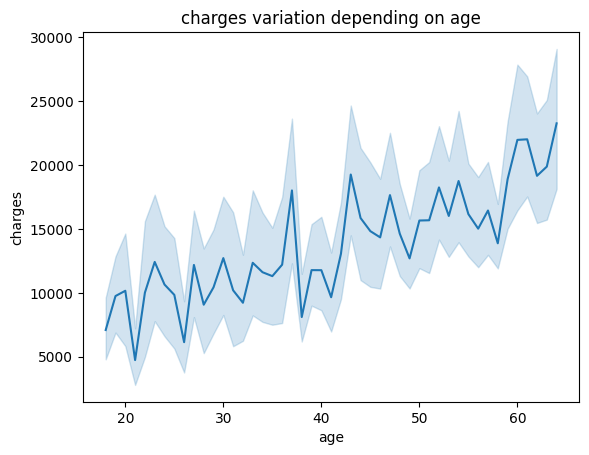

In [62]:
sns.lineplot(data=df,x='age',y='charges')
plt.title('charges variation depending on age')

we can see that older peaple charges more than younger peaple

Text(0.5, 1.0, 'charges variation depending on children number')

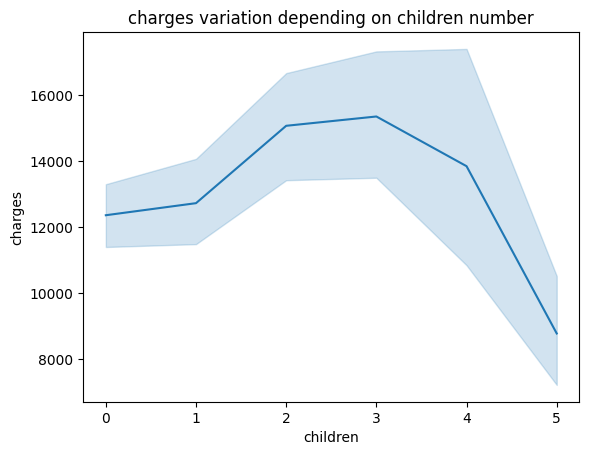

In [63]:
sns.lineplot(data=df,x='children',y='charges')
plt.title('charges variation depending on children number')

In [16]:
smokers=df[(df['smoker']=='yes')].shape[0]
print(f'smoker percentage : {(smokers/1338)*100:.4} %')

smoker percentage : 20.48 %


so 20.48% of peaple are smokers and their charges less than non smokers <30000, on the average, and older peaple charges more than younger peaple, and for those who are non smokers and have bmi less than 30 they charges more than smokers and non smokers who have bmi <30 
so can see that these parametres have an effect on the charges

the majority of peaple charges on the mean 13500, smokers and non smokers who has bmi < 30(kg/m^2)

## data selections

we will use the 4 labels the smoker, bmi, age, children.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x= np.array(df[['age','bmi','smoker','children']])
y= np.array(df['charges'])

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

smoker is a categorical type (string) so we need to encode it int format that the machine can proccece.

In [20]:
encoder = LabelEncoder()
encoder.fit(x[:,2])
x[:,2]=encoder.fit_transform(x[:,2])

now we will scale the data 

In [21]:
scaler = StandardScaler()
model = scaler.fit(x)
scaled_data = model.transform(x)

print(np.max(scaled_data[:,1]),np.min(scaled_data[:,1]))

3.685522232281654 -2.412011094241716


selecting the training set and the testing set

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

## build the model

In [23]:
from sklearn.linear_model import SGDRegressor

In [44]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_train,y_train)

SGDRegressor(max_iter=10000)

In [45]:
y_pred_test = sgdr.predict(x_test)

## evaluating the model

In [26]:
from sklearn.metrics import r2_score ,mean_squared_error

In [46]:
sgdr.score(x_test,y_test)

-280325942569.0833

In [47]:
r2_score(y_test,y_pred_test)

-280325942569.0833


after scaling the data and encode it the linear model in first degree didn't give a good result so we will use a polynomial function to fit the data better

In [48]:
train_mses = []
cv_mses = []
models = []
scalers = []
accuracy=[]

for i in range(1,11) :
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    model = SGDRegressor(max_iter=10000)
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    poly = PolynomialFeatures(i, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_test)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_test, yhat) / 2
    cv_mses.append(cv_mse)
    
    accuracy.append(model.score(X_cv_mapped_scaled,y_test)*100)

In [49]:
acc=np.argmax(accuracy)

In [53]:
accuracy[acc]


90.04715184344182

In [57]:
print(f" after using the polynomial form in {acc+1} degree the accuracy is {accuracy[acc]:.4}%")

 after using the polynomial form in 3 degree the accuracy is 90.05%
